# Weather Prediction CNN Model Training
This notebook demonstrates the training process of a CNN model for weather prediction, including both regular and subsampled approaches.

In [1]:
import os
from model_cnn import Model_CNN
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_path = '/Users/lauritsfauli/PycharmProjects/Final_project_APML/era5'
model = Model_CNN(data_path)

## Training Without Subsampling
First, let's train the model without subsampling to establish a baseline.

In [3]:
print("Loading data without subsampling...")
model.load_data(sub_sampling=False)
model.prepare_data_for_tensorflow()

Loading data without subsampling...
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
input_file_names_t2m: ['era5_1940_temperature_2m.nc', 'era5_1941_temperature_2m.nc', 'era5_1942_temperature_2m.nc', 'era5_1943_temperature_2m.nc', 'era5_1944_temperature_2m.nc']
T2m input shape: (1827, 120, 408)
input_file_names_t2m: ['era5_1940_temperature_2m.nc', 'era5_1941_temperature_2m.nc', 'era5_1942_temperature_2m.nc', 'era5_1943_temperature_2m.nc', 'era5_1944_temperature_2m.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (18

In [4]:
regular_conv_layers = [
    (32, 3, 4),
    (64, 3, 2),
    (64, 3, 2)
]
regular_fc_layers = [128, 64]

print("Building model for regular data...")
model.build_model(
    dropout_rate=0.2,
    conv_layers=regular_conv_layers,
    fc_layers=regular_fc_layers,
    sigmoid_output=False)

print("Training model without subsampling...")
model.train_model(
    epochs=100,
    batch_size=256,
    learning_rate=1e-4,
    validation_split=0.2,
    weight_decay=1e-5,
    patience=5,
    factor=0.5,
    early_stopping_patience=10,
    loss_function='MSE'
)
model.plot_model_on_test()

Building model for regular data...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 64, 7, 25]            --
│    └─Conv2d: 2-1                       [1, 32, 120, 408]         608
│    └─BatchNorm2d: 2-2                  [1, 32, 120, 408]         64
│    └─ReLU: 2-3                         [1, 32, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 32, 30, 102]          --
│    └─Dropout2d: 2-5                    [1, 32, 30, 102]          --
│    └─Conv2d: 2-6                       [1, 64, 30, 102]          18,496
│    └─BatchNorm2d: 2-7                  [1, 64, 30, 102]          128
│    └─ReLU: 2-8                         [1, 64, 30, 102]          --
│    └─MaxPool2d: 2-9                    [1, 64, 15, 51]           --
│    └─D

(0.02236758, 0.09694799)

In [8]:
model.plot_model_on_test()

(np.float32(0.024921758), np.float32(0.10240422))

In [15]:
def export_model_to_onnx(model_wrapper, path="flexible_cnn.onnx", input_shape=(1, 2, 120, 408)):
    import torch
    model_wrapper.model.eval()
    dummy_input = torch.randn(input_shape)
    torch.onnx.export(
        model_wrapper.model,
        dummy_input,
        path,
        opset_version=11,
        input_names=["input"],
        output_names=["output"],
        dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}}
    )
    print(f"Exported ONNX model to {path}")


def visualize_model_with_torchview(model_wrapper, input_shape=(1, 2, 120, 408), output_file="model_graph", dpi=600):
    try:
        from torchview import draw_graph
    except ImportError:
        raise ImportError("Install torchview with: pip install torchview")

    model_wrapper.model.eval()
    graph = draw_graph(model_wrapper.model, input_size=input_shape, expand_nested=True)

    # ✅ Set DPI by modifying the graph attributes
    graph.visual_graph.graph_attr.update(dpi=str(dpi))

    # Render as PNG with higher DPI
    graph.visual_graph.render(output_file, format="png", cleanup=True)
    print(f"Model diagram saved to {output_file}.png at {dpi} DPI")

In [16]:
export_model_to_onnx(model, path="cnn.onnx")
visualize_model_with_torchview(model, output_file="cnn_diagram")

Exported ONNX model to cnn.onnx
Model diagram saved to cnn_diagram.png at 600 DPI


regular_conv_layers = [
    (32, 3, 4),
    (64, 3, 2),
    (64, 3, 2)
]
regular_fc_layers = [128, 64]
MSEregular_conv_layers = [
    (32, 3, 4),
    (64, 3, 2),
    (64, 3, 2)
]
regular_fc_layers = [128, 64]
MSE

(np.float32(0.018239222), np.float32(0.08284569))

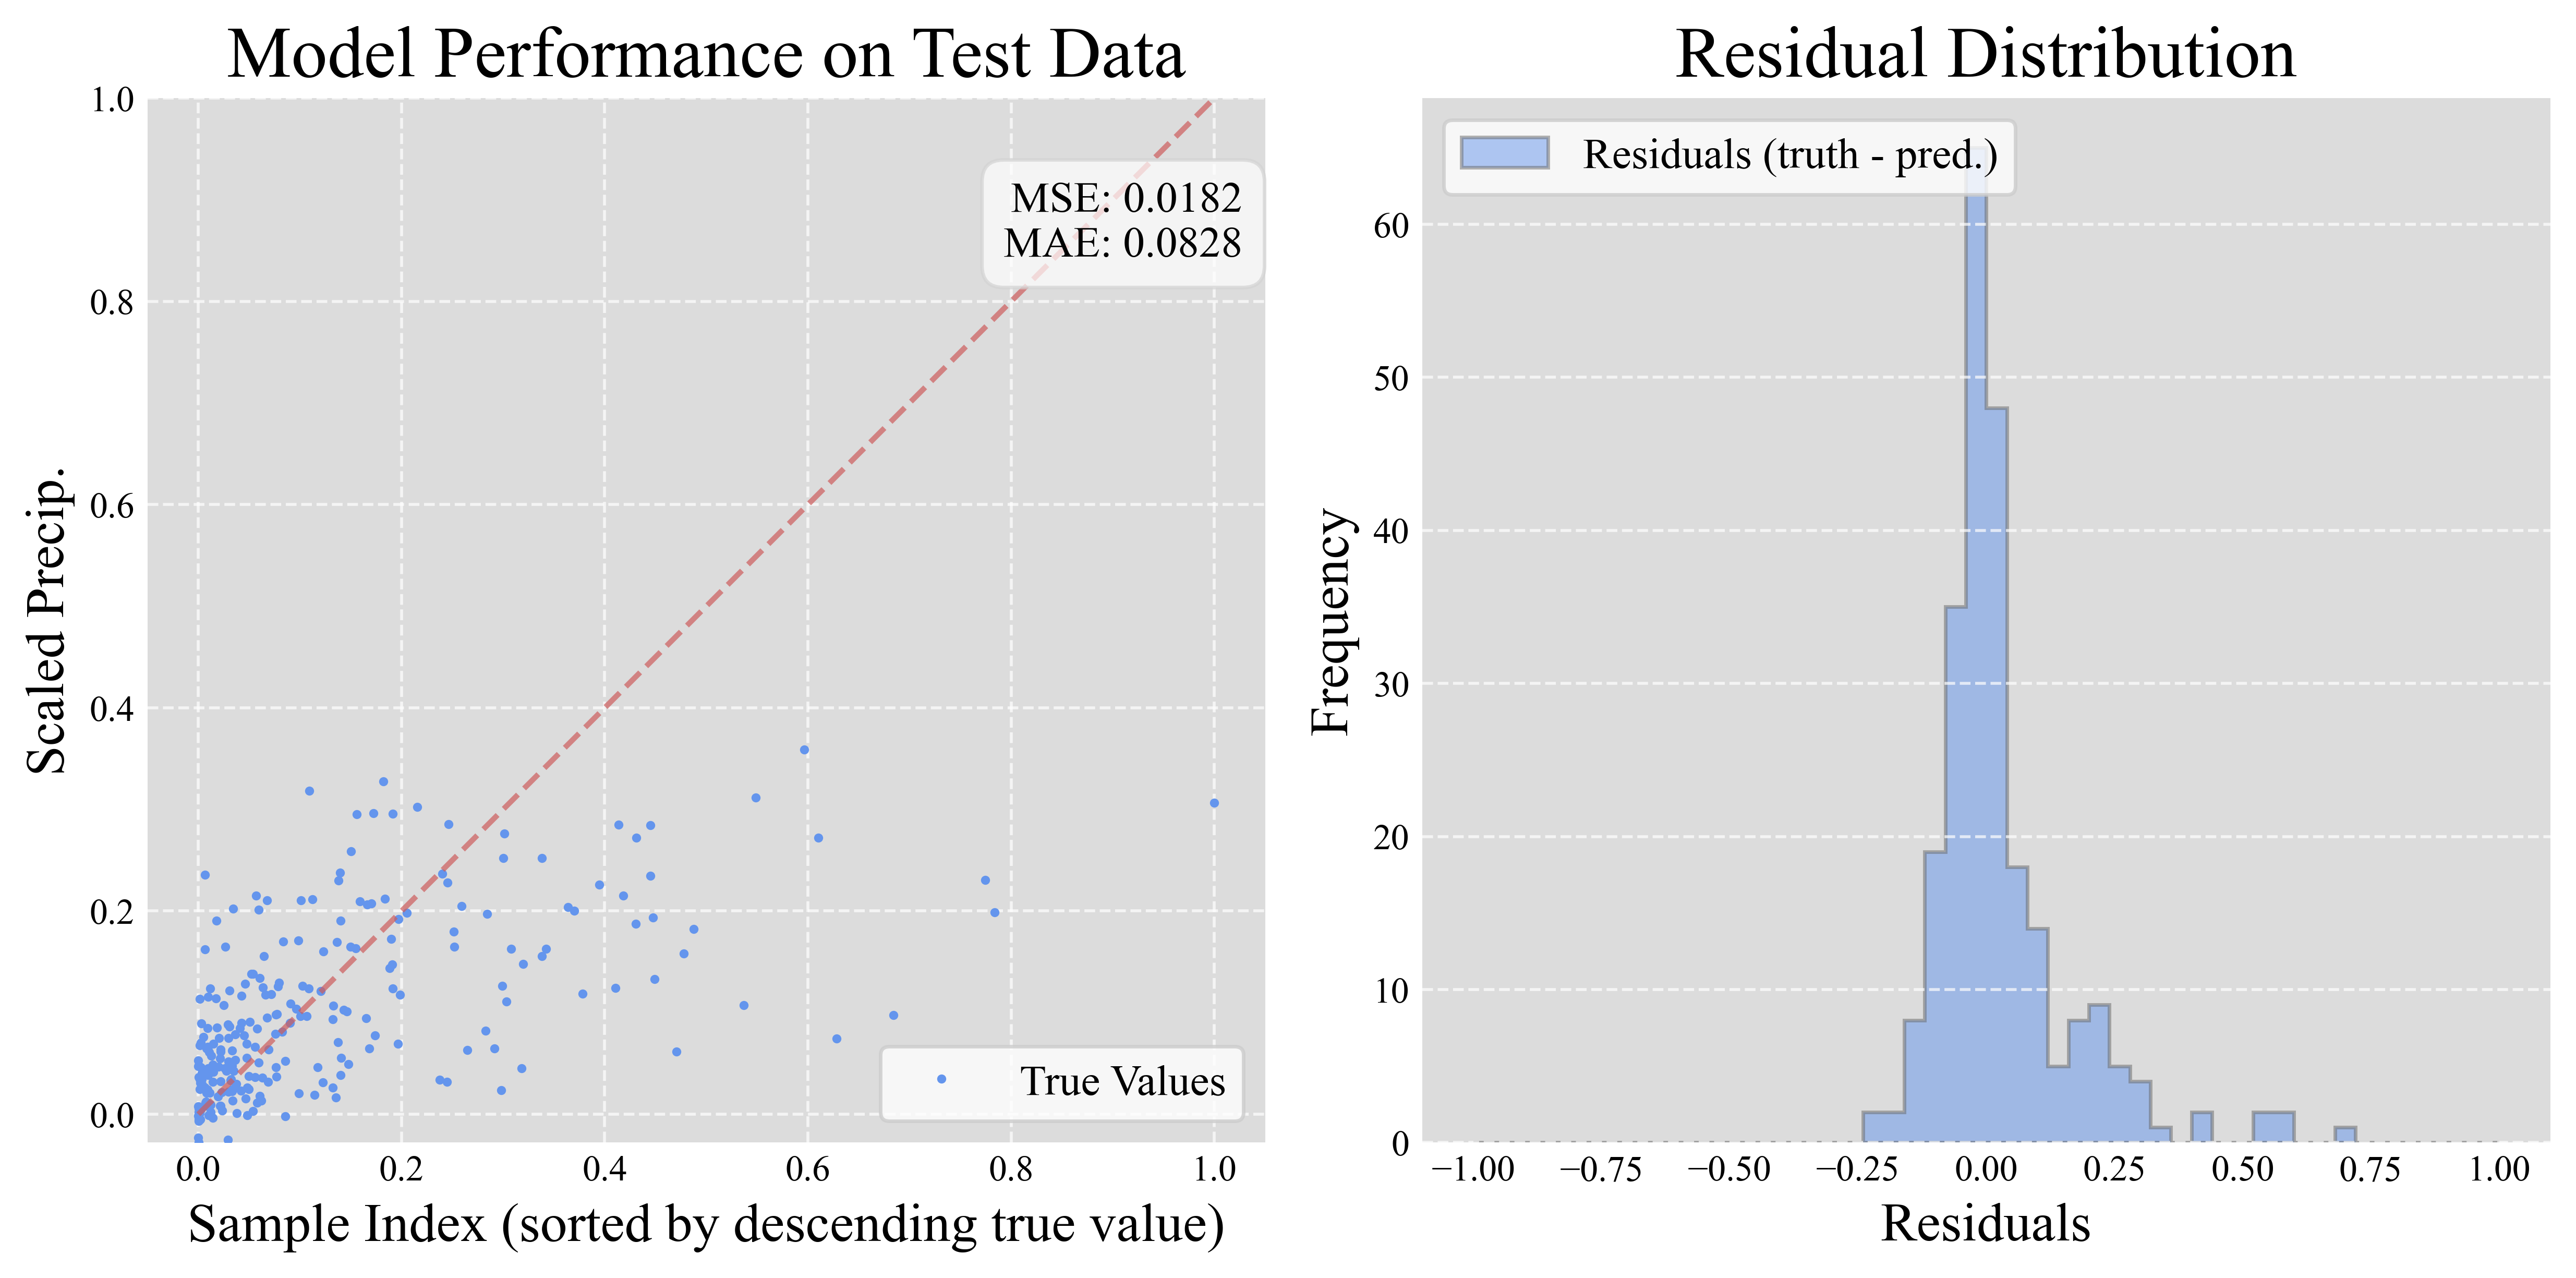

In [65]:
def plot_model(self, ax_title='Model Performance on Test Data', save_name=None):
    rc = {
        "font.family": "serif",
        "mathtext.fontset": "stix"
    }
    plt.rcParams.update(rc)
    plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

    # Get predictions and true values as NumPy arrays
    y_true = self.y_test.numpy().squeeze()
    y_pred = self.model(self.X_test).detach().numpy().squeeze()



    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=1200)
    ax[0].set_aspect('equal', adjustable='box')
    ax[0].plot(y_true,y_pred, label='True Values', color='cornflowerblue', ls='', marker='.', markersize=3)
    #plot a line y=x
    ax[0].plot([0,1], [0,1], color='indianred', linestyle='--',alpha = 0.7)



    # ax[0].plot(y_pred_sorted, label='Predicted Values', color='indianred', alpha=0.7,ls='', marker='.', markersize=3)
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))

    bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.7, pad=0.5, edgecolor='lightgrey')
    ax[0].text(0.98, 0.92, f'MSE: {mse:.4f}\nMAE: {mae:.4f}',
               transform=ax[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
               bbox=bbox_props)
    ax[0].set_title(ax_title, fontsize=20)
    ax[0].set_xlabel('Sample Index (sorted by descending true value)', fontsize=15)
    ax[0].set_ylabel('Scaled Precip.', fontsize=15)
    ax[0].grid(True, linestyle='--', alpha=0.7, axis='both', color='white')
    ax[0].legend(fontsize=12, loc='lower right')

    ax[0].set_ylim(min(0,min(y_pred)),max(1,max(y_pred)))


    residuals = y_true - y_pred
    hist_range = [-1, 1]
    ax[1].hist(residuals, range=hist_range, label='Residuals (truth - pred.)', bins=50, color='cornflowerblue',
               alpha=0.5, histtype='stepfilled', edgecolor='dimgrey')
    ax[1].set_xlabel('Residuals', fontsize=15)
    ax[1].set_ylabel('Frequency', fontsize=15)
    ax[1].set_title('Residual Distribution', fontsize=20)
    ax[1].grid(True, linestyle='--', alpha=0.7, axis='y', color='white')
    ax[1].legend(fontsize=12, loc='upper left')

    spine_args = ['top', 'right', 'left', 'bottom']

    for a in ax:
        a.set_facecolor('gainsboro')
        for spine in spine_args:
            a.spines[spine].set_visible(False)
        a.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    if save_name is not None:
        plt.savefig(save_name)

    return mse, mae

plot_model(model, ax_title='Model Performance on Test Data')

## Training With Subsampling
Now, let's train the model with subsampling using a modified architecture to handle the reduced dimensions.

In [16]:
model_subsampled = Model_CNN(data_path)

print("Loading data with subsampling...")
print("Original data shapes before subsampling:")
model_subsampled.load_data(sub_sampling=True, sub_sample_dim=4)
print("Data shapes after subsampling:")
print(f"X shape: {model_subsampled.X.shape}")
print(f"Target shape: {model_subsampled.target.shape}")
model_subsampled.prepare_data_for_tensorflow()

Loading data with subsampling...
Original data shapes before subsampling:
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
Sub-sampling data...
Sub-sampled X shape: (7308, 2, 30, 102)
Concatenated precipitation target shape: (7308,)
Data shapes after subsampling:
X shape: (7308, 2, 30, 102)
Target shape: (7308,)
X_train shap

In [17]:
subsampled_conv_layers = [
    (32, 3, 2),
    (64, 3, 2),
    (64, 3, 1)
]
subsampled_fc_layers = [128, 64]

print("Building model for subsampled data...")
model_subsampled.build_model(
    dropout_rate=0.2,
)

Building model for subsampled data...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 64, 7, 25]            --
│    └─Conv2d: 2-1                       [1, 32, 30, 102]          608
│    └─BatchNorm2d: 2-2                  [1, 32, 30, 102]          64
│    └─ReLU: 2-3                         [1, 32, 30, 102]          --
│    └─MaxPool2d: 2-4                    [1, 32, 15, 51]           --
│    └─Dropout2d: 2-5                    [1, 32, 15, 51]           --
│    └─Conv2d: 2-6                       [1, 64, 15, 51]           18,496
│    └─BatchNorm2d: 2-7                  [1, 64, 15, 51]           128
│    └─ReLU: 2-8                         [1, 64, 15, 51]           --
│    └─MaxPool2d: 2-9                    [1, 64, 7, 25]            --
│    

In [18]:
print("Training model with subsampling...")
model_subsampled.train_model(
    epochs=100,
    batch_size=256,
    learning_rate=1e-3,
    validation_split=0.2,
    weight_decay=1e-5,
    patience=5,
    factor=0.5,
    early_stopping_patience=7
)

Training model with subsampling...
Epoch 1/100 — Train Loss: 0.1458 — Val Loss: 0.0441
Epoch 2/100 — Train Loss: 0.0779 — Val Loss: 0.0394
Epoch 3/100 — Train Loss: 0.0669 — Val Loss: 0.0408
Epoch 4/100 — Train Loss: 0.0577 — Val Loss: 0.0381
Epoch 5/100 — Train Loss: 0.0515 — Val Loss: 0.0360
Epoch 6/100 — Train Loss: 0.0489 — Val Loss: 0.0365
Epoch 7/100 — Train Loss: 0.0443 — Val Loss: 0.0361
Epoch 8/100 — Train Loss: 0.0428 — Val Loss: 0.0356
Epoch 9/100 — Train Loss: 0.0418 — Val Loss: 0.0355
Epoch 10/100 — Train Loss: 0.0408 — Val Loss: 0.0356
Epoch 11/100 — Train Loss: 0.0399 — Val Loss: 0.0355
Epoch 12/100 — Train Loss: 0.0386 — Val Loss: 0.0356
Epoch 13/100 — Train Loss: 0.0381 — Val Loss: 0.0356
Epoch 14/100 — Train Loss: 0.0372 — Val Loss: 0.0358
Epoch 15/100 — Train Loss: 0.0381 — Val Loss: 0.0355
Epoch 16/100 — Train Loss: 0.0376 — Val Loss: 0.0354
Epoch 17/100 — Train Loss: 0.0367 — Val Loss: 0.0355
Epoch 18/100 — Train Loss: 0.0366 — Val Loss: 0.0355
Epoch 19/100 — Train

Evaluating model with subsampling...
Mean Squared Error on test set (with subsampling): 0.034680


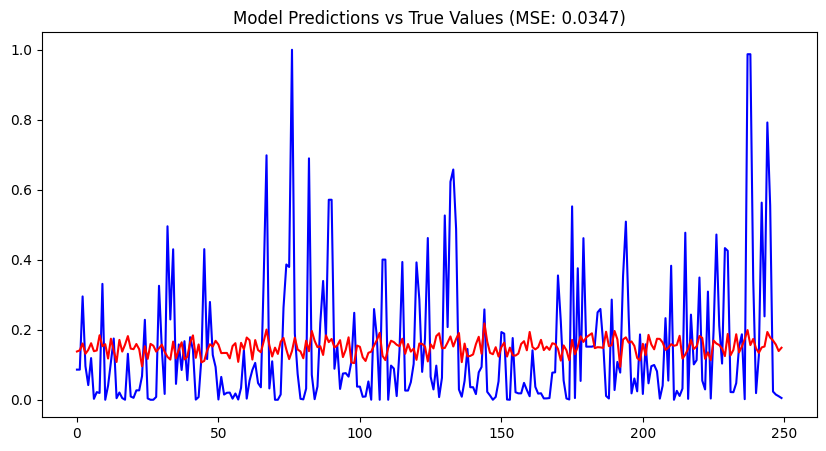

In [19]:
print("Evaluating model with subsampling...")
mse_subsampled = model_subsampled.plot_model_on_test()
print(f'Mean Squared Error on test set (with subsampling): {mse_subsampled:.6f}')

## Comparison of Results
Compare the performance between regular and subsampled approaches.

In [ ]:
print("Performance Comparison:")
print(f"MSE without subsampling: {mse_regular:.6f}")
print(f"MSE with subsampling: {mse_subsampled:.6f}")
print(f"Relative improvement: {((mse_regular - mse_subsampled) / mse_regular) * 100:.2f}%")

## Optuna search
trying to find better HP's

Loading data for optimization...
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
input_file_names_t2m: ['era5_1940_temperature_2m.nc', 'era5_1941_temperature_2m.nc', 'era5_1942_temperature_2m.nc', 'era5_1943_temperature_2m.nc', 'era5_1944_temperature_2m.nc']
T2m input shape: (1827, 120, 408)
input_file_names_t2m: ['era5_1940_temperature_2m.nc', 'era5_1941_temperature_2m.nc', 'era5_1942_temperature_2m.nc', 'era5_1943_temperature_2m.nc', 'era5_1944_temperature_2m.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,

[I 2025-06-06 12:27:49,904] A new study created in memory with name: no-name-27d4d6e9-32e6-4755-bb90-be06f5174cc3


X_train shape: (1577, 2, 120, 408)
y_train shape: (1577, 1)
X_test shape: (250, 2, 120, 408)
y_test shape: (250, 1)
Starting Optuna hyperparameter optimization...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 149, 3, 12]           --
│    └─Conv2d: 2-1                       [1, 43, 120, 408]         2,193
│    └─BatchNorm2d: 2-2                  [1, 43, 120, 408]         86
│    └─ReLU: 2-3                         [1, 43, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 43, 60, 204]          --
│    └─Dropout2d: 2-5                    [1, 43, 60, 204]          --
│    └─Conv2d: 2-6                       [1, 64, 60, 204]          68,864
│    └─BatchNorm2d: 2-7                  [1, 64, 60, 204]          128
│    └─ReLU: 2-8  

[I 2025-06-06 12:48:50,138] Trial 0 finished with value: 0.044104963541030884 and parameters: {'n_conv_layers': 5, 'conv_filters_0': 43, 'kernel_size_0': 5, 'pool_size_0': 2, 'conv_filters_1': 64, 'kernel_size_1': 5, 'pool_size_1': 2, 'conv_filters_2': 88, 'kernel_size_2': 3, 'pool_size_2': 2, 'conv_filters_3': 92, 'kernel_size_3': 5, 'pool_size_3': 2, 'conv_filters_4': 149, 'kernel_size_4': 5, 'pool_size_4': 2, 'n_fc_layers': 3, 'fc_size_0': 96, 'fc_size_1': 96, 'fc_size_2': 32, 'dropout_rate': 0.3008147035907189, 'learning_rate': 0.00011069364453395478, 'weight_decay': 1.3535187740458202e-06}. Best is trial 0 with value: 0.044104963541030884.


Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 97, 3, 12]            --
│    └─Conv2d: 2-1                       [1, 36, 120, 408]         684
│    └─BatchNorm2d: 2-2                  [1, 36, 120, 408]         72
│    └─ReLU: 2-3                         [1, 36, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 36, 60, 204]          --
│    └─Dropout2d: 2-5                    [1, 36, 60, 204]          --
│    └─Conv2d: 2-6                       [1, 59, 60, 204]          19,175
│    └─BatchNorm2d: 2-7                  [1, 59, 60, 204]          118
│    └─ReLU: 2-8                         [1, 59, 60, 204]          --
│    └─MaxPool2d: 2-9                    [1, 59, 30, 102]          --
│    └─Dropout2d: 2-10                   [1

[I 2025-06-06 12:55:51,268] Trial 1 finished with value: 0.0387527272105217 and parameters: {'n_conv_layers': 5, 'conv_filters_0': 36, 'kernel_size_0': 3, 'pool_size_0': 2, 'conv_filters_1': 59, 'kernel_size_1': 3, 'pool_size_1': 2, 'conv_filters_2': 78, 'kernel_size_2': 3, 'pool_size_2': 2, 'conv_filters_3': 97, 'kernel_size_3': 3, 'pool_size_3': 2, 'conv_filters_4': 97, 'kernel_size_4': 5, 'pool_size_4': 2, 'n_fc_layers': 2, 'fc_size_0': 128, 'fc_size_1': 64, 'dropout_rate': 0.4002368225582871, 'learning_rate': 0.00020673186463837458, 'weight_decay': 9.018370562712699e-06}. Best is trial 1 with value: 0.0387527272105217.



Best trial results:
Best MSE: 0.038753

Best hyperparameters:
n_conv_layers: 5
conv_filters_0: 36
kernel_size_0: 3
pool_size_0: 2
conv_filters_1: 59
kernel_size_1: 3
pool_size_1: 2
conv_filters_2: 78
kernel_size_2: 3
pool_size_2: 2
conv_filters_3: 97
kernel_size_3: 3
pool_size_3: 2
conv_filters_4: 97
kernel_size_4: 5
pool_size_4: 2
n_fc_layers: 2
fc_size_0: 128
fc_size_1: 64
dropout_rate: 0.4002368225582871
learning_rate: 0.00020673186463837458
weight_decay: 9.018370562712699e-06

Training final model with optimal hyperparameters...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 97, 3, 12]            --
│    └─Conv2d: 2-1                       [1, 36, 120, 408]         684
│    └─BatchNorm2d: 2-2                  [1, 36, 120, 408]         7

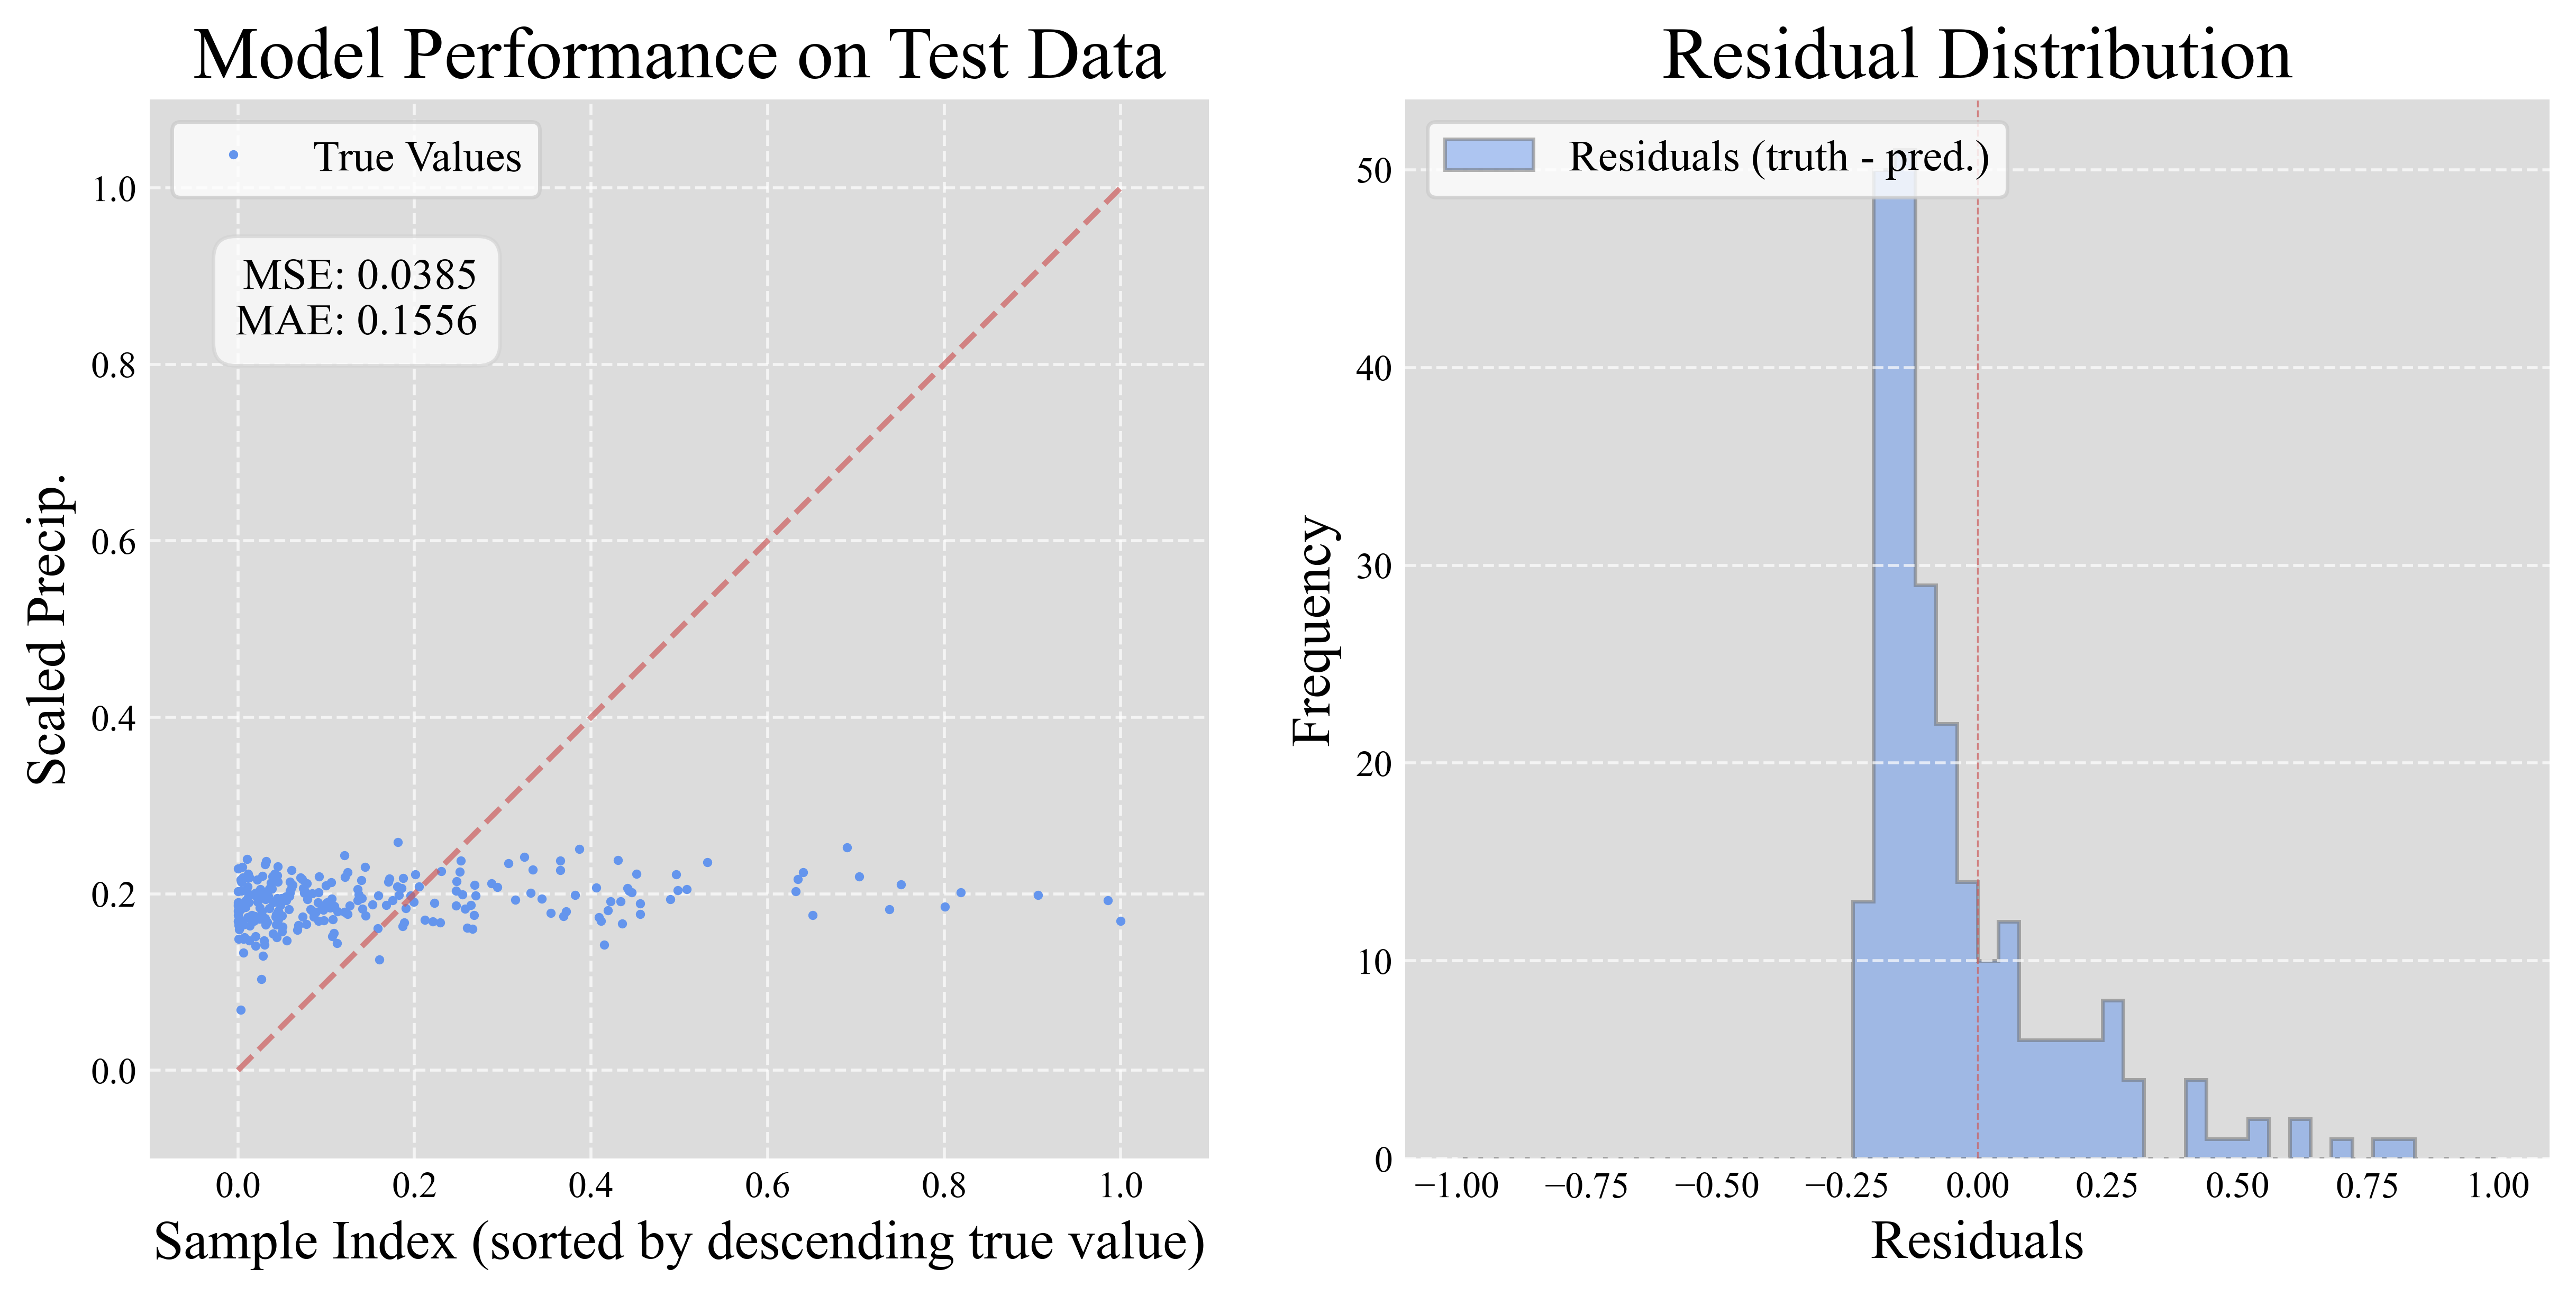

In [4]:
# Create a new model instance for optimization
model_optuna = Model_CNN(data_path)

print("Loading data for optimization...")
model_optuna.load_data(sub_sampling=False)
model_optuna.prepare_data_for_tensorflow()

# Run Optuna trials
print("Starting Optuna hyperparameter optimization...")
n_trials = 2  # You can adjust this number based on your computational resources
best_trial = model_optuna.optuna_trial(ntrials=n_trials)

# Print results
print("\nBest trial results:")
print(f"Best MSE: {best_trial.value:.6f}")
print("\nBest hyperparameters:")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

# Train final model with best parameters
print("\nTraining final model with optimal hyperparameters...")

# Extract best parameters
best_dropout = best_trial.params["dropout_rate"]
best_lr = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]

# Build conv layers from best parameters
best_conv_layers = []
i = 0
while f"conv_filters_{i}" in best_trial.params:
    filters = best_trial.params[f"conv_filters_{i}"]
    kernel = best_trial.params[f"kernel_size_{i}"]
    pool = best_trial.params[f"pool_size_{i}"]
    best_conv_layers.append((filters, kernel, pool))
    i += 1

# Build FC layers from best parameters
best_fc_layers = []
i = 0
while f"fc_size_{i}" in best_trial.params:
    fc_size = best_trial.params[f"fc_size_{i}"]
    best_fc_layers.append(fc_size)
    i += 1

# Build and train final model with optimal parameters
model_optuna.build_model(
    dropout_rate=best_dropout,
    conv_layers=best_conv_layers,
    fc_layers=best_fc_layers
)

model_optuna.train_model(
    epochs=100,
    batch_size=256,
    learning_rate=best_lr,
    weight_decay=best_weight_decay,
    patience=5,
    factor=0.5,
    early_stopping_patience=10,
)

# Evaluate final model
print("\nFinal model evaluation:")
mse_optuna, mae_optuna = model_optuna.plot_model_on_test()
